In [1]:
from IIR_filt import PyIIR_filt
import soundfile as sf
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [2]:
#setting up a wave

samplerate = 11025
audio length = 2.462040816326531 seconds
array lenght = 27144 samples


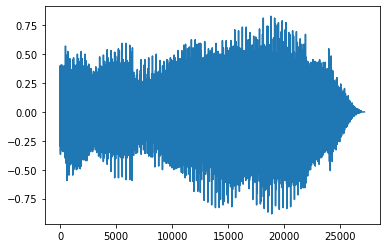

In [3]:
#opening a wav file --- our trusty sitar

audio, samplerate = sf.read('sitar.wav')
buffersize = 156

#we want to zero pad the file so that it will emulate a realtime stream
audio = np.append(audio, np.full(buffersize - (len(audio) % buffersize), 0.0))

print('samplerate = {}'.format(samplerate))
print('audio length = {} seconds'.format(len(audio)/samplerate))
print('array lenght = {} samples'.format(len(audio)))
plt.plot(audio)
plt.show()
display(Audio(audio, rate=samplerate))

In [4]:
#we can put this in a genorator

def buffer_gen(audio, buffersize):

    index = 0
    while index < len(audio):
        yield(audio[index:index+buffersize])
        index += buffersize
    return

[0.05720037 0.11440075 0.05720037]
[ 1.         -1.21887934  0.44768083]


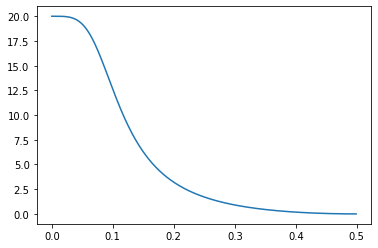

In [5]:
#a window that we can test with
order = 2
ripple = .9
cuttoff = 1000
samplerate=samplerate
#b, a = sig.cheby1(order, ripple, cuttoff, 'low', fs=samplerate)
b, a = sig.butter(order, cuttoff, 'low', fs=samplerate)
print(b)
print(a)
#plot this for show
w, h = sig.freqz(b, a)
plt.plot(w/np.pi/2, 20 * np.abs(h))
plt.show()

In [6]:
filt = PyIIR_filt(b"lowpass", 4, 1000, 1000)

filt.set_coefs(b.astype(np.float32), a.astype(np.float32))



[0.05720037 0.11440074 0.05720037]
[ 1.         -1.2188793   0.44768083]
0.05720037221908569
1.0
0.11440074443817139
-1.2188793420791626
0.05720037221908569
0.44768083095550537


In [11]:
buffers = buffer_gen(audio, buffersize)

output = np.empty(0)

for buffer in buffers:
    print('buffer A : {}'.format(buffer))
    buffer = filt.process(buffer.astype(np.float32), len(buffer))
    print('buffer B : {}'.format(buffer))
    output = np.append(output, buffer)

buffer A : [-0.015625   0.1875     0.2890625  0.3984375  0.3828125  0.3046875
  0.21875    0.171875   0.078125  -0.0390625 -0.140625  -0.2265625
 -0.25      -0.2109375 -0.078125   0.125      0.28125    0.3359375
  0.2265625  0.0234375 -0.0859375 -0.03125    0.03125    0.03125
 -0.0703125 -0.1796875 -0.0703125  0.1328125  0.3046875  0.2890625
  0.109375   0.109375   0.03125   -0.0859375 -0.1953125 -0.3671875
 -0.296875  -0.1796875 -0.03125    0.078125   0.1015625  0.1875
  0.1796875  0.09375   -0.0703125 -0.15625   -0.234375  -0.2265625
 -0.1484375  0.046875   0.1328125  0.1953125  0.15625    0.1171875
  0.0390625 -0.0078125 -0.0390625 -0.09375   -0.125     -0.1015625
 -0.046875   0.1171875  0.296875   0.3515625  0.3203125  0.2578125
  0.203125   0.09375   -0.1328125 -0.25      -0.3359375 -0.3046875
 -0.1875    -0.140625  -0.078125   0.1328125  0.265625   0.203125
 -0.0703125 -0.2109375 -0.3046875 -0.265625  -0.21875   -0.2265625
 -0.1953125 -0.03125    0.1875     0.34375    0.40625    

buffer A : [-0.296875  -0.109375  -0.1328125 -0.234375  -0.234375   0.0390625
  0.390625   0.515625   0.453125   0.3359375  0.4140625  0.40625
  0.2578125  0.078125  -0.125     -0.1875    -0.234375  -0.2578125
 -0.3671875 -0.2734375 -0.125     -0.0390625 -0.15625   -0.390625
 -0.3984375 -0.2578125 -0.0546875  0.1640625  0.3984375  0.59375
  0.5390625  0.2734375  0.2578125  0.1015625  0.3203125  0.40625
  0.2578125  0.0859375 -0.1328125 -0.125      0.0078125  0.0390625
  0.015625  -0.2265625 -0.3125    -0.21875   -0.125     -0.1171875
 -0.109375   0.0546875  0.1953125  0.3984375  0.2578125  0.0859375
  0.09375    0.1640625  0.1328125 -0.15625   -0.4453125 -0.3828125
 -0.1484375  0.0234375 -0.046875  -0.2109375 -0.234375  -0.125
 -0.0859375  0.        -0.0546875  0.        -0.03125    0.0859375
  0.125      0.0625    -0.046875  -0.046875   0.078125   0.21875
  0.3671875  0.421875   0.4140625  0.234375  -0.046875  -0.3203125
 -0.359375  -0.28125   -0.359375  -0.6171875 -0.6953125 -0.47656

The Original Audio


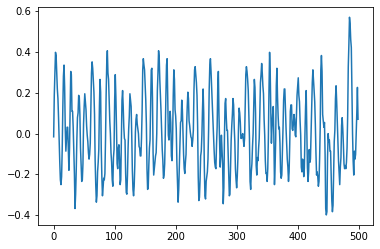

11025


In [12]:
print('The Original Audio')
plt.plot(audio[:500])
plt.show()
display(Audio(audio, rate=samplerate))
print(samplerate)

The Filtered Audio


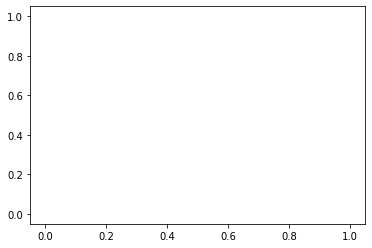

In [14]:
print('The Filtered Audio')
plt.plot(output)
plt.show()
display(Audio(output, rate=samplerate))